# 数据读入模块

In [23]:
import pandas as pd

train_data = pd.read_csv("data\main\df_train_b1.csv", index_col=0)
test_data = pd.read_csv('data\main\df_test_b1.csv', index_col=0)


## 要读入除了main之外的数在此处添加

In [24]:
import os
filenames = ["data\detail\df_basic_b1.csv",
             "data\detail\df_corp_b1.csv",
             "data\detail\df_judicial_b1.csv",
             "data\detail\df_loan2_b1.csv",
             "data\detail\df_query_b1.csv"]
for filename in filenames:
    temp = pd.read_csv(filename)
    train_data = pd.merge(train_data, temp, on="cust_id",
                          how="left", suffixes=("", "_y"))
    test_data = pd.merge(test_data, temp, on="cust_id",
                         how="left", suffixes=("", "_y"))


In [25]:
train_data['is_judicial']=[0 if pd.isna(i) else 1 for i in train_data['judicial_reason']]
test_data['is_judicial']=[0 if pd.isna(i) else 1 for i in test_data['judicial_reason']]

## 处理NAN

In [26]:
def delnan(df):
    df = df.dropna(how="all", axis=1)  # 删除全是空值的列
    df = df.fillna(-99)
    return df


In [27]:
df_train = delnan(train_data)
df_test = delnan(test_data)


In [28]:
""" for i in range(2, 17):
    print(df_train.iloc[:, i].value_counts()) """


' for i in range(2, 17):\n    print(df_train.iloc[:, i].value_counts()) '

In [29]:
type_col = ["basic_1",
            "basic_10",
            "basic_12",
            "basic_14",
            "loan1_16",
            "loan1_20",
            "loan1_23",
            "loan1_25",]

## 转化为one-hot编码（不宜采用）

In [30]:

def to_one_hot(df, colnames):
    df = pd.get_dummies(df, columns=colnames)
    return df


""" df_train = to_one_hot(df_train, type_col)
df_test = to_one_hot(df_test, type_col)
for i in df_train.columns:
    if i not in df_test.columns:
        df_test[i] = 0
 """

' df_train = to_one_hot(df_train, type_col)\ndf_test = to_one_hot(df_test, type_col)\nfor i in df_train.columns:\n    if i not in df_test.columns:\n        df_test[i] = 0\n '

## 证据权重

In [31]:
import pandas as pd
import numpy as np

def cal_woe(df,df_no_label,x_cols,y_col):
    for i in x_cols:
        x_set=pd.unique(df[i])
        for j in x_set:
            woe=np.mean(df[df[i]==j][y_col])
            df[i].replace(j,woe,inplace=True)
            df_no_label[i].replace(j,woe,inplace=True)
    return df,df_no_label

In [32]:
df_train,df_test=cal_woe(df_train,df_test,type_col,"label")

In [33]:
full_col_name = list(df_train.columns)
basic_col = [i for i in full_col_name if "basic" in i]
loan_col = [i for i in full_col_name if "loan" in i]
overdue_col = [i for i in full_col_name if "overdue" in i]
query_col = [i for i in full_col_name if "query" in i]
judicial_col=[i for i in full_col_name if "judicial" in i]

""" for i in judicial_col:
    df_train[i].astype("float")
    df_test[i].astype("float") """

' for i in judicial_col:\n    df_train[i].astype("float")\n    df_test[i].astype("float") '

## 设置哪些x作为模型自变量输入

In [34]:
x_col = basic_col+['is_judicial']+loan_col+query_col+overdue_col
# x_col为模型读入的自变量列名称


""" x_col=['loan2_3_y',
 'loan1_6',
 'loan1_32',
 'loan1_31',
 'basic_7',
 'loan2_4_y',
 'loan2_3',
 'loan1_15',
 'loan2_5_y',
 'loan1_30',
 'loan1_7',
 'loan1_3',
 'query_1',
 'query_7',
 'loan1_17',
 'query_4',
 'loan1_14',
 'basic_1_y',
 'loan1_21',
 'query_1_y'] """

" x_col=['loan2_3_y',\n 'loan1_6',\n 'loan1_32',\n 'loan1_31',\n 'basic_7',\n 'loan2_4_y',\n 'loan2_3',\n 'loan1_15',\n 'loan2_5_y',\n 'loan1_30',\n 'loan1_7',\n 'loan1_3',\n 'query_1',\n 'query_7',\n 'loan1_17',\n 'query_4',\n 'loan1_14',\n 'basic_1_y',\n 'loan1_21',\n 'query_1_y'] "

In [35]:
# df_train.drop(columns=drop_col)

# 训练模型

## 划分测试集训练集

In [36]:
""" from sklearn import model_selection


X = df_train[x_col]
Y = df_train["label"]
seed = 666
test_size = 0.1
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, Y, test_size=test_size, random_state=seed) """


' from sklearn import model_selection\n\n\nX = df_train[x_col]\nY = df_train["label"]\nseed = 666\ntest_size = 0.1\nX_train, X_test, y_train, y_test = model_selection.train_test_split(\n    X, Y, test_size=test_size, random_state=seed) '

## 训练模型

## 超参数

In [37]:
N = 1000
num_round = 100
local_test_size=3000

max_depth = [3, 4, 5,6,7,8]
eta = [0.1,0.06]
colsample_bytree = [0.8,0.7, 0.6,0.5]
scale_pos_weight = [1, 3, 6, 10,20, 30]
test_size=[0.3,0.5,0.7]
subsample=[0.7,0.6,0.5,0.4]
par_lambda=[1,1.5,2,3]
alpha=[0,0.2,0.4,0.6,0.8]
min_child_weight=[1,2,3,4,5,6,10]


### train划分为
* 本地测试集（固定）d_localtest
* 训练集（固定）
  * 评估集（每次的模型不同）dtest
  * 真正地训练集（每次的模型不同）dtrain

In [38]:
import copy
import xgboost as xgb
import random
from sklearn import model_selection
from sklearn.metrics import roc_auc_score


pred_labels = []
local_test_labels = []
loss_seq = []
max_auc_loss = 0
flag=0

num_seq=list(range(len(df_train)))
np.random.shuffle(num_seq)

X_local_test=df_train[x_col].iloc[num_seq[0:local_test_size]]
Y_local_test=df_train["label"].iloc[num_seq[0:local_test_size]]

d_localtest=xgb.DMatrix(X_local_test,label=Y_local_test)

X = df_train[x_col].iloc[num_seq[local_test_size:len(df_train)]]
Y = df_train['label'].iloc[num_seq[local_test_size:len(df_train)]]
x_perd = xgb.DMatrix(df_test[x_col])

for i in range(N):

    #seed = 666
    test_size_this_round=random.choice(test_size)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, Y, test_size=test_size_this_round)
    # seed+=1

    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    evallist = [(dtest, 'eval')]

    param = {
        'max_depth': random.choice(max_depth),
        'eta': random.choice(eta),
        'colsample_bytree': random.choice(colsample_bytree),
        'objective': 'binary:logistic',
        #'verbosity':0,
        'scale_pos_weight': random.choice(scale_pos_weight),
        'eval_metric': 'auc',
        'subsample':random.choice(subsample),
        'alpha':random.choice(alpha),
        'lambda':random.choice(par_lambda),
        'min_child_weight':random.choice(min_child_weight),
        #'seed': 666,
        'tree_method': 'gpu_hist',
        'gpu_id': 0,
        #"enable_enable_categorical":True,
    }
    
    bst = xgb.train(param, dtrain, num_round, evals=evallist,
                    early_stopping_rounds=10, verbose_eval=False)
    
    loss = float(bst.eval(dtest).split(":")[1])
    train_loss = float(bst.eval(dtrain).split(":")[1])
    local_test_loss = float(bst.eval(d_localtest).split(":")[1])

    pred_label = list(bst.predict(x_perd))
    test_label = list(bst.predict(xgb.DMatrix(X_local_test)))
    # temp=roc_auc_score(y_test,test_label)
    # print(test_label[0:10])


    temp_dict={"test_auc":loss,"train_auc":train_loss,'local_test_auc':local_test_loss,'test_size':test_size_this_round}
    temp_dict.update(param)

    #info_df=info_df.append(pd.DataFrame(temp_dict))
    if flag==0:
        info_df=pd.DataFrame(temp_dict,index=[i])
        flag=1
    else:
        info_df=pd.concat([info_df,pd.DataFrame(temp_dict,index=[i])])

    if loss > max_auc_loss:
        best_bst = copy.deepcopy(bst)
        max_auc_loss = loss
    

    print(i+1, ":", loss, sep="")
    #print(param)
    #print("-------------------------")
    pred_labels.append([j for j in pred_label])
    local_test_labels.append(copy.deepcopy(test_label))


print('最大AUC:', max(info_df['local_test_auc']), sep="")

1:0.6564435404938255
2:0.6956943169064381
3:0.6811366233272576
4:0.7387210590855908
5:0.684896815058395
6:0.7299774331740476
7:0.6985750822067958
8:0.6846046896551724
9:0.7379456345071577
10:0.6682527942143327
11:0.7157563169449358
12:0.7174356513351234
13:0.7069299813820474
14:0.6555867584561588
15:0.7350732730358157
16:0.6659975601864805
17:0.7062856809475835
18:0.6744315190699834
19:0.7025753175615054
20:0.6981217830665345
21:0.6783339910092289
22:0.6696728406383885
23:0.6775538285224865
24:0.7002330543246348
25:0.6657206350099358
26:0.6925389241650299
27:0.7144401076738532
28:0.7057956468937396
29:0.7228670721380104
30:0.7492497723583673
31:0.6940897861958554
32:0.7094551258584586
33:0.7080977898084589
34:0.687215556474969
35:0.6709514233705861
36:0.6655623903431043
37:0.7228712337343085
38:0.7133596967339115
39:0.6786003896131698
40:0.6923907450223685
41:0.663916839088599
42:0.6907533180065398
43:0.673854102977879
44:0.7162302780173648
45:0.6478800664512967
46:0.6748563971807249
4

In [39]:
info_df

,test_auc,train_auc,local_test_auc,test_size,max_depth,eta,colsample_bytree,objective,scale_pos_weight,eval_metric,subsample,alpha,lambda,min_child_weight,tree_method,gpu_id
0,0.656444,0.994826,0.665512,0.7,8,0.10,0.8,binary:logistic,20,auc,0.5,0.8,1.0,6,gpu_hist,0
1,0.695694,0.930085,0.700831,0.3,5,0.06,0.8,binary:logistic,20,auc,0.4,0.0,1.5,5,gpu_hist,0
2,0.681137,0.895582,0.643069,0.7,3,0.10,0.7,binary:logistic,20,auc,0.4,0.4,2.0,5,gpu_hist,0
3,0.738721,0.853641,0.706636,0.3,3,0.10,0.8,binary:logistic,20,auc,0.6,0.0,3.0,6,gpu_hist,0
4,0.684897,0.907063,0.676631,0.5,5,0.06,0.5,binary:logistic,3,auc,0.7,0.2,1.5,1,gpu_hist,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.721897,0.881383,0.700822,0.3,4,0.06,0.6,binary:logistic,3,auc,0.6,0.0,2.0,4,gpu_hist,0
996,0.677252,0.951483,0.672299,0.3,6,0.10,0.7,binary:logistic,10,auc,0.6,0.4,2.0,3,gpu_hist,0
997,0.692787,0.915856,0.650714,0.7,3,0.06,0.8,binary:logistic,20,auc,0.5,0.0,1.5,4,gpu_hist,0
998,0.672679,0.940996,0.666156,0.7,4,0.06,0.5,binary:logistic,20,auc,0.7,0.8,3.0,10,gpu_hist,0


In [40]:
info_df.to_csv("info.csv",encoding="utf-8",index=False)

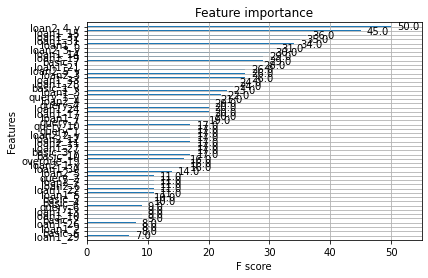

In [41]:
pic=xgb.plot_importance(best_bst,max_num_features=50)
temp=pic.get_ymajorticklabels()
important_x=[str(i).split("\'")[1] for i in temp]
important_x.reverse()

In [42]:
important_x

['loan2_4_y',
 'loan1_15',
 'loan1_32',
 'loan1_31',
 'loan1_6',
 'loan2_3_y',
 'loan1_14',
 'loan1_19',
 'basic_7',
 'loan1_21',
 'loan2_5_y',
 'loan2_3',
 'loan1_33',
 'loan1_28',
 'basic_1_y',
 'loan1_3',
 'query_1_y',
 'loan2_4',
 'query_4',
 'loan1_24',
 'loan1_17',
 'loan1_7',
 'query_7',
 'query_10',
 'query_1',
 'loan2_2_y',
 'loan2_12',
 'loan2_11',
 'loan1_27',
 'basic_3_y',
 'basic_10',
 'overdue_19',
 'loan2_1_y',
 'loan1_30',
 'loan2_5',
 'query_2',
 'loan2_7',
 'loan2_6',
 'loan1_22',
 'loan1_5',
 'basic_5',
 'basic_4',
 'query_6',
 'loan1_13',
 'loan1_10',
 'basic_2',
 'loan1_26',
 'loan1_2',
 'basic_6',
 'loan1_29']

* basic_7:年龄
* 

# 输出模块

In [43]:
import time
import numpy as np
from sklearn.metrics import roc_auc_score

date = time.strftime("%Y%m%d-%H%M%S", time.localtime())
res_num = np.argsort([-i for i in info_df['local_test_auc']])

# 选择前n个结果进行平均（手动指定or在本地测试集排序选出）
if True:
    max_auc = -1
    list_temp = []
    for i in range(N):
        list_temp.append(local_test_labels[res_num[i]])
        temp = np.mean(list_temp, axis=0)
        temp_auc = roc_auc_score(Y_local_test, temp)
        print(i, temp_auc)
        if temp_auc > max_auc:
            max_auc = temp_auc
            n = i
else:
    n = 100

res_num = res_num[0:n]

final_pred_label = np.mean([pred_labels[i] for i in res_num], axis=0)
#local_auc = roc_auc_score(y_test, final_pred_label)
print("本地测试集前", n, "个auc为", [list(info_df['local_test_auc'])[i] for i in res_num], sep="")
print("平均之后最大AUC为",max_auc,sep="")

res = pd.DataFrame({
    'cust_id': list(df_test["cust_id"]),
    'label': final_pred_label,
})
res.to_csv("./output/result"+date+".csv", encoding="utf-8", index=False)


0 0.7382055055401662
1 0.7427037989711122
2 0.747424688365651
3 0.7496259151167393
4 0.7524732884843688
5 0.7531194351009102
6 0.7521795854768499
7 0.7522352344677483
8 0.75174366838148
9 0.7517158438860309
10 0.7529648545706371
11 0.7516076375148399
12 0.7520682874950535
13 0.752501112979818
14 0.7527391669964384
15 0.7533080233478433
16 0.7524423723783142
17 0.7521146616541354
18 0.7534935199841709
19 0.7535584438068856
20 0.7534440542144836
21 0.7537593984962406
22 0.7536110011871785
23 0.7535677186387021
24 0.7524609220419469
25 0.7539418035219628
26 0.7531905421448358
27 0.7533698555599525
28 0.7530529654728926
29 0.7536975662841313
30 0.7540376434507321
31 0.7541736743173724
32 0.7541056588840522
33 0.754164399485556
34 0.7533760387811634
35 0.7531998169766521
36 0.7535306193114364
37 0.7538521468144045
38 0.7536790166204986
39 0.7531812673130195
40 0.7530112287297189
41 0.7523619905025722
42 0.751944623070835
43 0.751864241195093
44 0.7518178670360112
45 0.7517282103284526
46 0.

# 一些tips

* 提升n有一定提升(如何确定n？)
  * n=40 0.6763
  * n=10 0.6728
  * n=100 0.6774
  * 太大也不好

# 一些进展

* 随机参数
* XGB模型
* 本地测试集auc较高（0.75+）
* 部分类型变量进行了one-hot处理
* 把细分表除了loan与主表合并

# tbd

* 处理细分表的loan，给出指标
* 确定变量类型，以便对所有（or重要）分类变量进行one-hot处理
* 新模型？